In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection  import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import datasets

In [2]:
pwd = 'D:/gitProject/Modeling/breast-cancer-wisconsin.csv'

In [3]:
#读取数据无列名
df1 = pd.read_csv(pwd,
                  header='infer',
                  names=['Sample_code_number',
                         'Clump_Thickness',
                         'Uniformity_of_Cell_Size',
                         'Uniformity_of_Cell_Shape',
                         'Marginal_Adhesion',
                         'Single_Epithelial_Cell_Size',
                         'Bare_Nuclei',
                         'Bland_Chromatin',
                         'Normal_Nucleoli',
                         'Mitoses',
                         'Class'])

In [4]:
#异常值剔除
df1 = df1[df1['Bare_Nuclei'] != '?']

In [5]:
df1.head()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
len(df1)

683

In [7]:
#划分训练集测试集
X_train, X_test, y_train, y_test = train_test_split(df1[['Clump_Thickness',
        'Uniformity_of_Cell_Size',
        'Uniformity_of_Cell_Shape',
        'Marginal_Adhesion',
        'Single_Epithelial_Cell_Size',
        'Bare_Nuclei',
        'Bland_Chromatin',
        'Normal_Nucleoli',
        'Mitoses']], df1['Class'], test_size=0.2, random_state=2795)

In [8]:
# 对数据进行归一化处理
standarScaler = StandardScaler()
standarScaler.fit(X_train)
X_train_std = standarScaler.transform(X_train)
X_test_std = standarScaler.transform(X_test)

In [9]:
kmax = round(math.sqrt(len(X_train)))
param_grid = {
    'n_neighbors': range(1, kmax, 2), 
    'algorithm': ['auto'],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski'],
    'p': [1, 2]
}

In [10]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=10)
grid_search.fit(X_train_std, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto'], 'metric': ['minkowski'],
                         'n_neighbors': range(1, 23, 2), 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [11]:
#最佳预估器
best_estimator = grid_search.best_estimator_
best_estimator

KNeighborsClassifier(n_neighbors=11, weights='distance')

In [12]:
##训练集最佳结果
best_score = grid_search.best_score_
best_score

0.9761952861952862

In [13]:
#预测分类
y_predict=grid_search.predict(X_test_std)
y_predict

array([2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2,
       4, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2,
       4, 2, 2, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       4, 2, 2, 2, 2], dtype=int64)

In [14]:
#测试集准确率
score = best_estimator.score(X_test_std, y_test)
score

0.9562043795620438

In [15]:
#混淆矩阵
#confusion_matrix(y_test, y_predict)

<ipython-input-2-41b7d9ffd558>:36: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
<ipython-input-2-41b7d9ffd558>:36: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


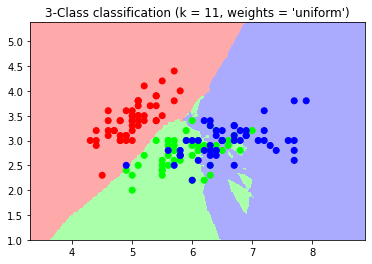

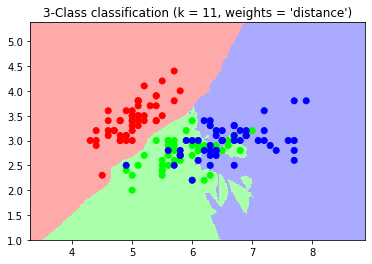

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 11

 # 导入一些要玩的数据
iris = datasets.load_iris()
x = iris.data[:, :2]  # 我们只采用前两个feature,方便画图在二维平面显示
y = iris.target

h = .02  # 网格中的步长

 # 创建彩色的图
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#weights是KNN模型中的一个参数，上述参数介绍中有介绍，这里绘制两种权重参数下KNN的效果图
for weights in ['uniform', 'distance']:
    # 创建了一个knn分类器的实例，并拟合数据
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(x, y)

    # 绘制决策边界，为此，我们将为每个分配一个颜色
    # 来绘制网格中的点 [x_min, x_max]x[y_min, y_max].
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # 将结果放入一个彩色图中
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # 绘制训练点
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.show()